In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('letterdata.csv')
df.head(10)

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
5,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
6,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
7,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
8,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
9,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8


In [3]:
df.shape

(20000, 17)

In [6]:
X = np.array(df)[:, 1:17]
y = np.array(df.letter)[:]

In [7]:
X

array([[2, 8, 3, ..., 8, 0, 8],
       [5, 12, 3, ..., 8, 4, 10],
       [4, 11, 6, ..., 7, 3, 9],
       ...,
       [6, 9, 6, ..., 12, 2, 4],
       [2, 3, 4, ..., 9, 5, 8],
       [4, 9, 6, ..., 7, 2, 8]], dtype=object)

In [8]:
y

array(['T', 'I', 'D', ..., 'T', 'S', 'A'], dtype=object)

In [9]:
X_train = X[0:16000, :]
X_test = X[16001:, :]
y_train = y[:16000]
y_test = y[16001:]

In [10]:
X_train

array([[2, 8, 3, ..., 8, 0, 8],
       [5, 12, 3, ..., 8, 4, 10],
       [4, 11, 6, ..., 7, 3, 9],
       ...,
       [8, 14, 7, ..., 7, 5, 8],
       [4, 7, 5, ..., 8, 5, 8],
       [2, 1, 3, ..., 9, 4, 10]], dtype=object)

In [11]:
from sklearn import svm

model = svm.SVC(C=3)

C is penalty of wrong classifications. It tells the algorithm how much you care about misclassified points. A high value for C tells the algorithm that you care more about classifying all of the training points correctly.

In [12]:
model.fit(X_train, y_train)

SVC(C=3)

In [13]:
y_pred = model.predict(X_test)

In [14]:
y_pred

array(['N', 'V', 'I', ..., 'T', 'S', 'A'], dtype=object)

In [15]:
model.score(X_test, y_test)

0.9472368092023006

In [16]:
y_grid = (np.column_stack([y_test, y_pred]))

In [17]:
y_grid

array([['N', 'N'],
       ['V', 'V'],
       ['I', 'I'],
       ...,
       ['T', 'T'],
       ['S', 'S'],
       ['A', 'A']], dtype=object)

In [18]:
import string

lab = list(string.ascii_uppercase[0:26])
plab = ["Predicted " + s for s in lab]

In [19]:
lab

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [20]:
plab

['Predicted A',
 'Predicted B',
 'Predicted C',
 'Predicted D',
 'Predicted E',
 'Predicted F',
 'Predicted G',
 'Predicted H',
 'Predicted I',
 'Predicted J',
 'Predicted K',
 'Predicted L',
 'Predicted M',
 'Predicted N',
 'Predicted O',
 'Predicted P',
 'Predicted Q',
 'Predicted R',
 'Predicted S',
 'Predicted T',
 'Predicted U',
 'Predicted V',
 'Predicted W',
 'Predicted X',
 'Predicted Y',
 'Predicted Z']

In [21]:
from sklearn import metrics
import seaborn as sns

cm = metrics.confusion_matrix(y_test, y_pred, labels = lab)

df_cm = pd.DataFrame(cm, index=[i for i in lab],
                     columns=[i for i in plab])

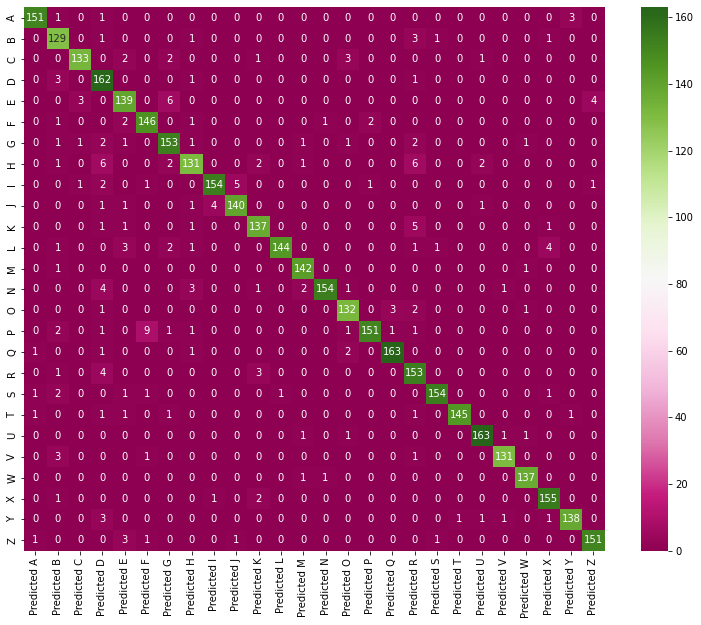

In [22]:
plt.figure(figsize=(13, 10))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='PiYG')
plt.show()